<a href="https://colab.research.google.com/github/amitsiwach/Machine-Learning-projects/blob/main/Heart%20Attack%20Classification%20Problem/Heart_attack_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

%matplotlib inline

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
#Reading the Data

df = pd.read_csv("/content/drive/MyDrive/heart_attack dataset.csv")

In [53]:
#Viewing the Data

df.head()

,Hattack,age,cp,trtbps,chol,thalachh,oldpeak
0,1,63.0,3,145.0,233.0,150.0,2.3
1,1,37.0,2,130.0,250.0,187.0,3.5
2,1,41.0,1,130.0,204.0,172.0,1.4
3,1,56.0,1,120.0,236.0,178.0,0.8
4,1,57.0,0,120.0,354.0,163.0,0.6


In [54]:
#Checking the dimension of the data

df.shape

(303, 7)

In [55]:
# Dividing all the columns into discrete & continuous features

numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]

In [56]:
continuous_feature

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

### Data Visualization

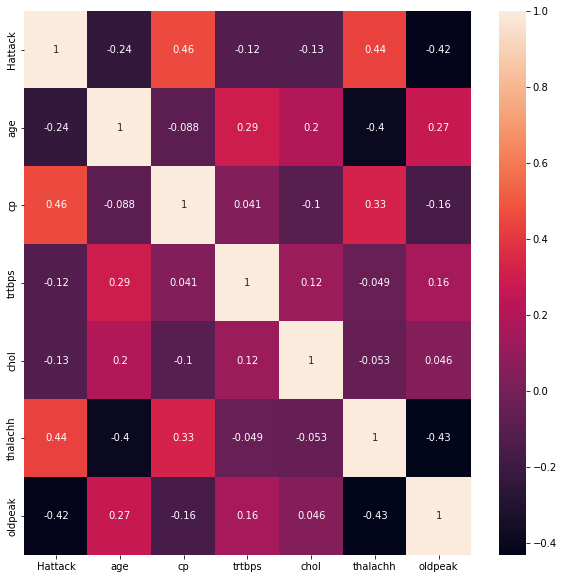

In [57]:
#Creating the Correlation plot among all variables

corrmat = df.corr(method = "spearman")
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


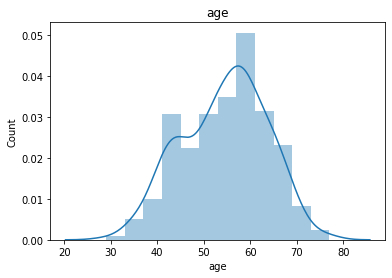

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


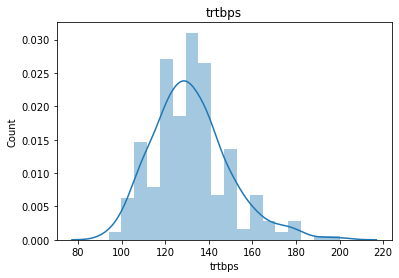

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


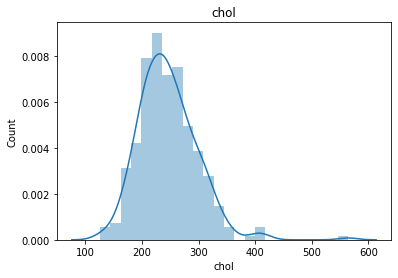

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


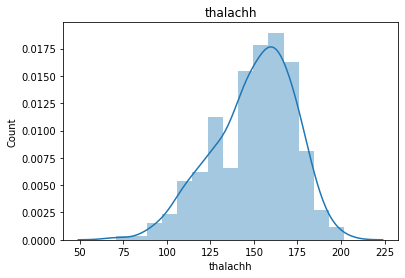

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


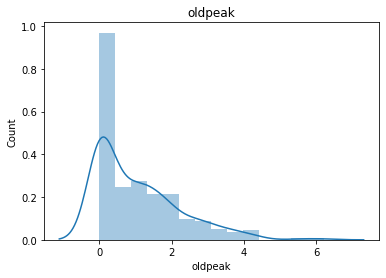

<Figure size 1080x1080 with 0 Axes>

In [58]:
#Plotting the continuous features to see the data distribution

for feature in continuous_feature:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

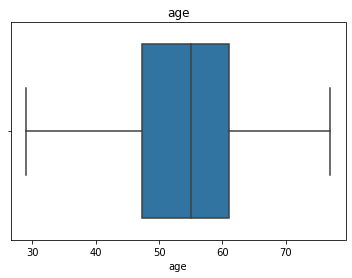

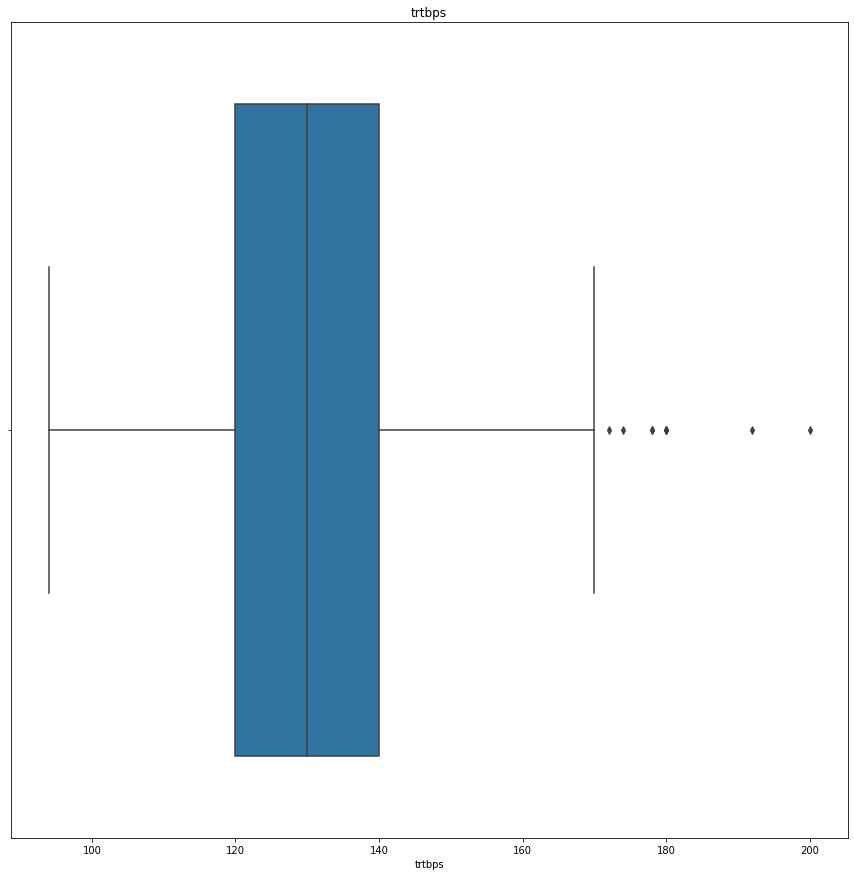

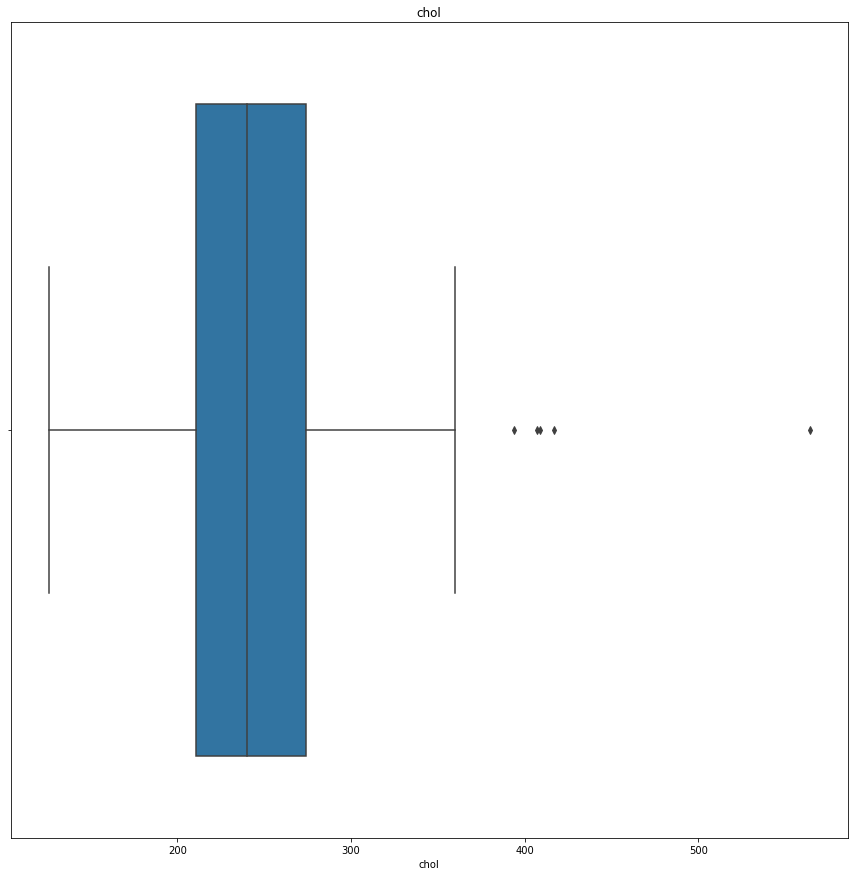

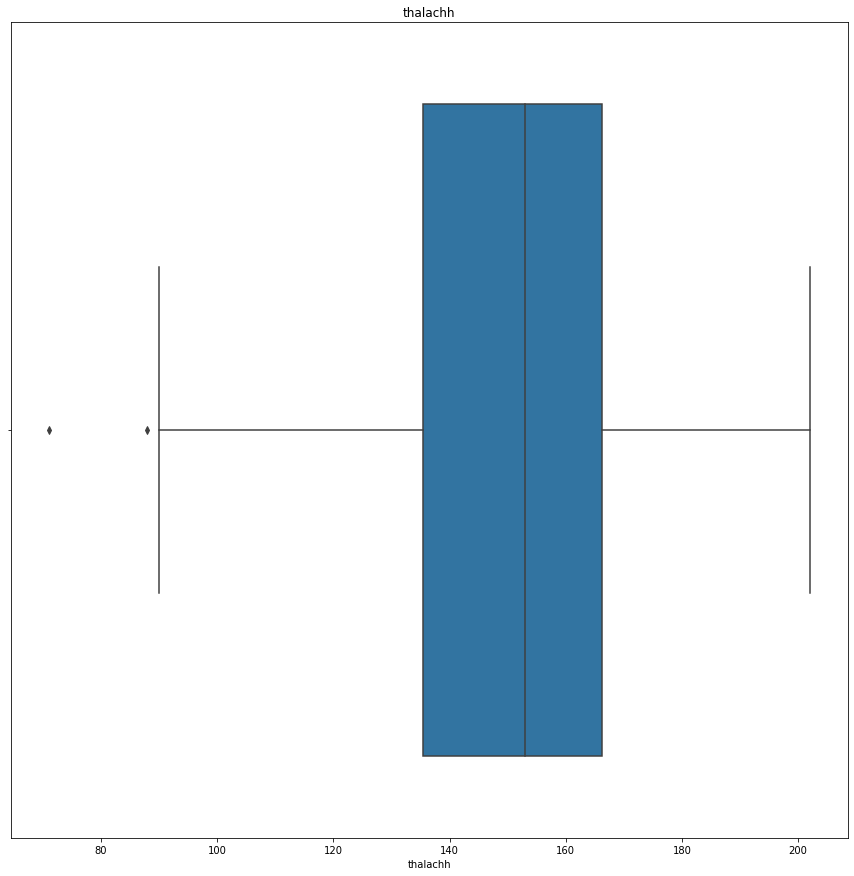

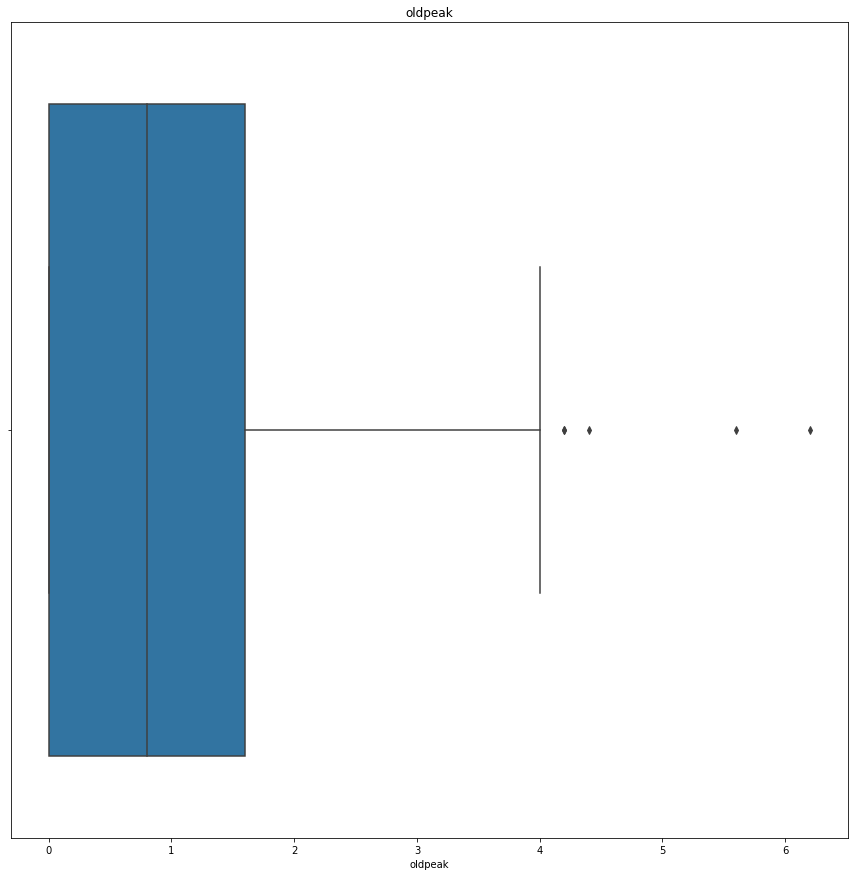

<Figure size 1080x1080 with 0 Axes>

In [59]:
#A for loop is used to plot a boxplot for all the continuous features to check the outliers

for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

## Data Pre-processing

## Outliers treatment

In [60]:
#Handling Outliers in 'trtbps' columns using Inter Quantile Range (IQR) method

IQR=df.trtbps.quantile(0.75)-df.trtbps.quantile(0.25)
lower_bridge=df.trtbps.quantile(0.25)-(IQR*1.5)
upper_bridge=df.trtbps.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

90.0 170.0


In [61]:
#Replacing Outliers in 'trtbps' columns using Inter Quantile Range (IQR) method

df.loc[df['trtbps']>=170,'trtbps']= 170
df.loc[df['trtbps']<=90,'trtbps']= 90

In [62]:
#Handling Outliers in 'chol' columns using Inter Quantile Range (IQR) method

IQR=df.chol.quantile(0.75)-df.chol.quantile(0.25)
lower_bridge=df.chol.quantile(0.25)-(IQR*1.5)
upper_bridge=df.chol.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

116.5 368.5


In [63]:
#Replacing Outliers in 'chol' columns using Inter Quantile Range (IQR) method

df.loc[df['chol']>=368.5,'chol']= 368.5
df.loc[df['chol']<=116.5,'chol']= 116.5

In [64]:
#Handling Outliers in 'thalachh' columns using Inter Quantile Range (IQR) method

IQR=df.thalachh.quantile(0.75)-df.thalachh.quantile(0.25)
lower_bridge=df.thalachh.quantile(0.25)-(IQR*1.5)
upper_bridge=df.thalachh.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

89.375 212.375


In [65]:
#Replacing Outliers in 'thalachh' columns using Inter Quantile Range (IQR) method

df.loc[df['thalachh']>=212.375,'thalachh']= 212.375
df.loc[df['thalachh']<=89.375,'thalachh']= 89.375

In [66]:
#Handling Outliers in 'oldpeak' columns using Inter Quantile Range (IQR) method

IQR=df.oldpeak.quantile(0.75)-df.oldpeak.quantile(0.25)
lower_bridge=df.oldpeak.quantile(0.25)-(IQR*1.5)
upper_bridge=df.oldpeak.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-2.4000000000000004 4.0


In [67]:
#Replacing Outliers in 'oldpeak' columns using Inter Quantile Range (IQR) method

df.loc[df['oldpeak']>=4.0,'oldpeak']= 4.0
df.loc[df['oldpeak']<=-2.4,'oldpeak']= -2.4

### Missing Value treatment

In [68]:
#Checking the missing values in all coulmns

df.isnull().sum()

Hattack     0
age         1
cp          0
trtbps      2
chol        5
thalachh    7
oldpeak     0
dtype: int64

In [69]:
#Replacing the missing values in Continuous features by mean of the column

for feature in continuous_feature:
    if(df[feature].isnull().sum()*100/len(df))>0:
        df[feature] = df[feature].fillna(df[feature].mean())

In [70]:
#Checking the missing values again
df.isnull().sum()

Hattack     0
age         0
cp          0
trtbps      0
chol        0
thalachh    0
oldpeak     0
dtype: int64

In [71]:
#Creating 'X' & 'Y' variables for modelling

X = df.drop('Hattack',axis=1)
Y = df['Hattack']

In [72]:
#Viewing 'X'

X.head()

,age,cp,trtbps,chol,thalachh,oldpeak
0,63.0,3,145.0,233.0,150.0,2.3
1,37.0,2,130.0,250.0,187.0,3.5
2,41.0,1,130.0,204.0,172.0,1.4
3,56.0,1,120.0,236.0,178.0,0.8
4,57.0,0,120.0,354.0,163.0,0.6


In [73]:
#Viewing 'Y'

Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Hattack, dtype: int64

In [74]:
#Checking dimensions of 'X' & 'Y'

X.shape, Y.shape

((303, 6), (303,))

### Scaling the variables between 0 to 1

In [75]:
#Calling the MinMaxScalar function 

scalar = MinMaxScaler()

In [76]:
#Fitting the 'X' into MinMaxScalar function 

scalar.fit(X)

MinMaxScaler()

In [77]:
#Transforming the 'X'

X = pd.DataFrame(scalar.transform(X), columns= ['age', 'cp', 'trtbps', 'chol', 'thalachh', 'oldpeak'])

In [78]:
#Viewing the new 'X'

X.head()

,age,cp,trtbps,chol,thalachh,oldpeak
0,0.708333,1.000000,0.671053,0.441237,0.538291,0.575
1,0.166667,0.666667,0.473684,0.511340,0.866815,0.875
2,0.250000,0.333333,0.473684,0.321649,0.733629,0.350
3,0.562500,0.333333,0.342105,0.453608,0.786903,0.200
4,0.583333,0.000000,0.342105,0.940206,0.653718,0.150


# Modelling

In [79]:
#Splittinig the data into Train set & Test set with a ratio of 80:20 for Modelling

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state =10)

### Logistic Reression Model

In [80]:
#Initiating the Logistic Regression Model
lr_model = LogisticRegression()

#Fitting/Training the Logistic Regression Model
lr_model.fit(X_train, Y_train)

LogisticRegression()

In [81]:
#Predicting for Test Dataset using the Logistic Regression Model 
y_pred = lr_model.predict(X_test)

#Checking the Accuracy of Logistic Regression Model on Test Dataset
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr_model.score(X_test,Y_test)))

Accuracy of logistic regression classifier on test set: 0.74


In [82]:
accuracy_score(Y_test,y_pred)

0.7377049180327869

In [83]:
y_pred

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1])

In [84]:
cm = confusion_matrix(Y_test, y_pred)
cm

array([[23, 12],
       [ 4, 22]])

Text(69.0, 0.5, 'Truth')

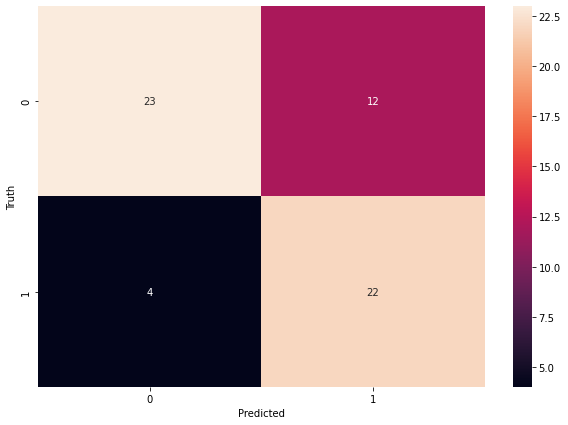

In [85]:
%matplotlib inline
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [86]:
Y_test.shape

(61,)

### Decision Tree Model

In [87]:
#Initiating the Decision Tree Model
dt_model =  tree.DecisionTreeClassifier(max_depth=4)

#Fitting/Training the Decision Tree Model
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=4)

In [88]:
#Predicting for Test Dataset using the Decision Tree Model
y_pred = dt_model.predict(X_test)

#Checking the Accuracy of Decision Tree Model on Test Dataset
print('Accuracy of Decision Tree model on test set: {:.2f}'.format(dt_model.score(X_test, Y_test)))

Accuracy of Decision Tree model on test set: 0.75


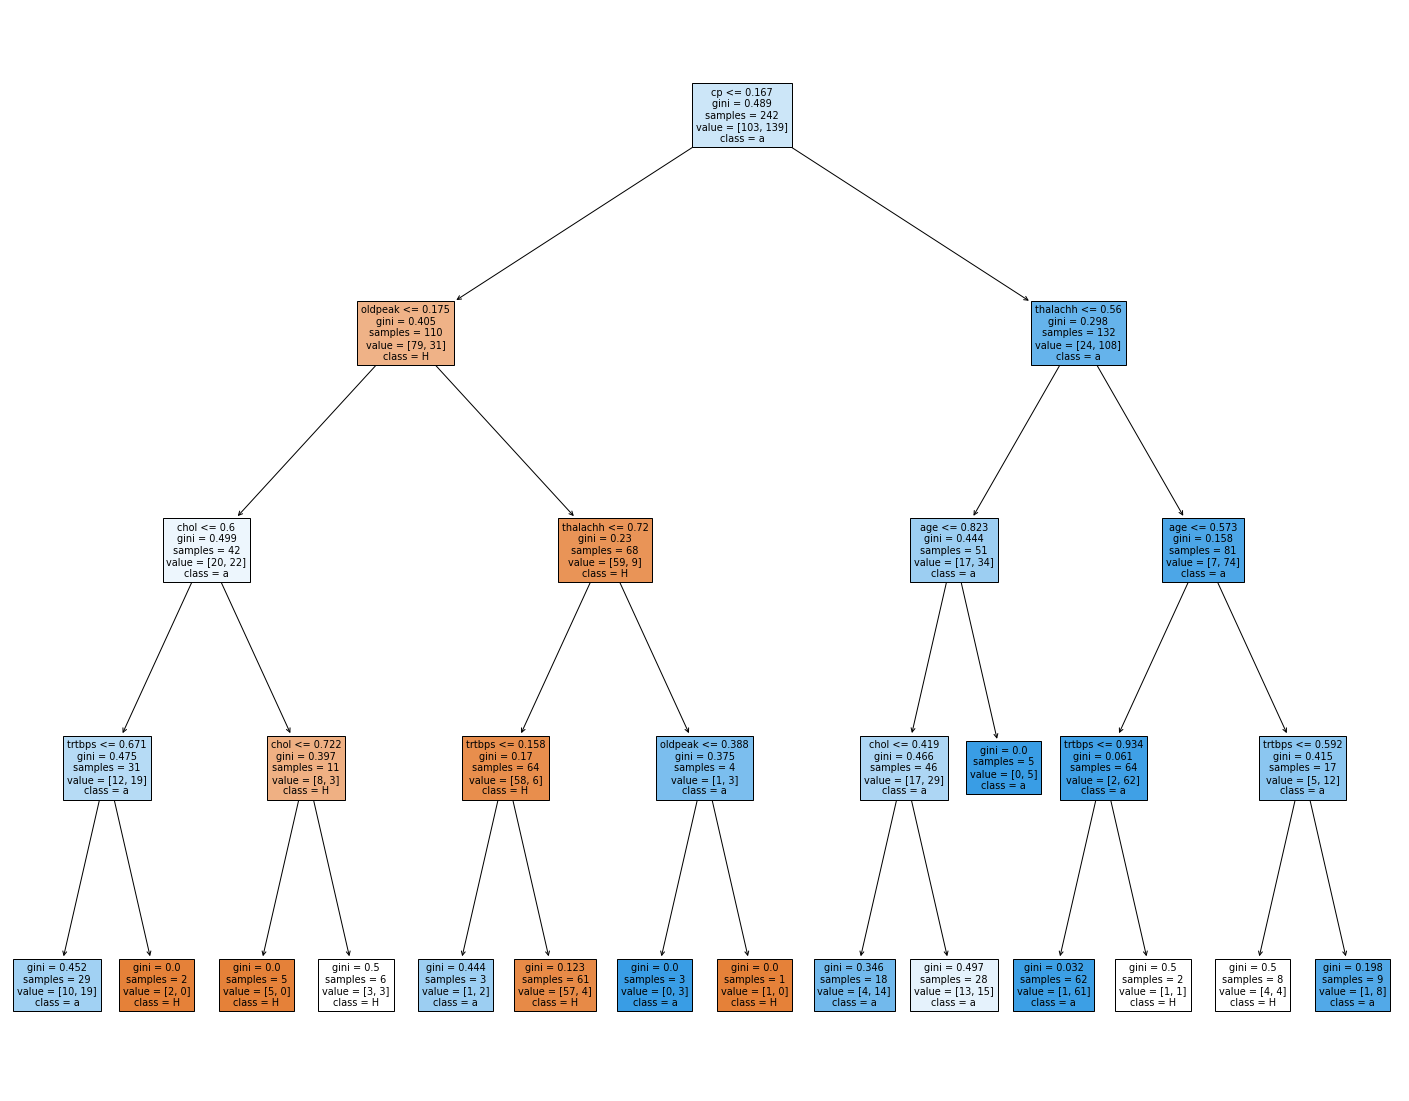

In [89]:
#Visualizing the Decision Tree for understanding

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_model, 
                   feature_names=X.columns,  
                   class_names='Hattack',
                   filled=True)

### Naive Bayes model

In [90]:
#Initiating the Naive Bayes Model
nb_model = GaussianNB()

#Fitting/Training the Naive Bayes Model
nb_model.fit(X_train, Y_train)

GaussianNB()

In [91]:
#Predicting for Test Dataset using the Naive Bayes Model
y_pred = nb_model.predict(X_test)

#Checking the Accuracy of Naive Bayes Model on Test Dataset
print('Accuracy of Naive Bayes model on test set: {:.2f}'.format(nb_model.score(X_test, Y_test)))

Accuracy of Naive Bayes model on test set: 0.79


### Random Forest Model

In [92]:
#Initiating the Random Forest Model
rf_model = RandomForestClassifier()

#Fitting/Training the Random Forest Model
rf_model.fit(X_train,Y_train)

RandomForestClassifier()

In [93]:
#Predicting for Test Dataset using the Random Forest Model
y_pred = rf_model.predict(X_test)

#Checking the Accuracy of Random Forest Model on Test Dataset
print('Accuracy of Random Forest model on test set: {:.2f}'.format(rf_model.score(X_test, Y_test)))

Accuracy of Random Forest model on test set: 0.66


### Support Vector Machine Model

In [94]:
#Initiating the Support Vector Machine Model
svm_model = SVC()

#Fitting/Training the Support Vector Machine Model
svm_model.fit(X_train,Y_train)

SVC()

In [95]:
#Predicting for Test Dataset using the Support Vector Machine Model
y_pred = svm_model.predict(X_test)

#Checking the Accuracy of Support Vector Machine Model on Test Dataset
print('Accuracy of Support Vector Machine model on test set: {:.2f}'.format(svm_model.score(X_test, Y_test)))

Accuracy of Support Vector Machine model on test set: 0.67
